### 학습목표
- 기초통계 사용

## 1 기초통계

### 데이터로딩

In [22]:
import pandas as pd
import os

In [24]:
# 작업디렉토리 변경
os.chdir('./data')

In [26]:
# 변경된 작업디렉토리 확인
print(os.getcwd())

C:\Users\lgdxschool2\python_study\lecture\파이썬 라이브러리\data


In [28]:
hr_info = pd.read_csv('./hr-info.csv', encoding='euc-kr')
hr_info.head()

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y


In [30]:
# 기술통계 확인 함수 -> 기본값이 수치데이터 
hr_info.describe()

,AGE,SERVICE_YEAR,PERFORMANCE_SCORE,SALARY,TRAINING_HOURS
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,31.930000,4.660000,1.919900,5987.000000,34.745000
std,7.111114,6.183492,1.748062,1182.676889,40.470971
min,22.000000,0.000000,0.000000,4500.000000,0.000000
25%,27.000000,0.000000,0.000000,5000.000000,4.000000
50%,30.000000,1.000000,1.795000,5600.000000,21.000000
75%,37.000000,8.000000,3.412500,6825.000000,56.750000
max,49.000000,25.000000,4.960000,10200.000000,240.000000


### 다른 데이터타입 기술통계 확인

In [19]:
hr_info.dtypes

EID                    object
ENAME                  object
GENDER                 object
ORG_CD                 object
POS_CD                 object
AGE                     int64
SERVICE_YEAR            int64
EDU_LEVEL              object
PERFORMANCE_SCORE     float64
SALARY                  int64
LAST_PROMO_DT          object
TRAINING_HOURS          int64
SKILLS                 object
ACTIVE_STATE           object
HIRE_DATE              object
RETIRE_DATE            object
RETIRE_REASON          object
REHIRE_YN              object
NATION                 object
ROUNDING_DEDUCTION     object
dtype: object

In [21]:
# object 타입 기술통계 확인하기
hr_info.describe(include=['object'])

,EID,ENAME,GENDER,ORG_CD,POS_CD,EDU_LEVEL,LAST_PROMO_DT,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
count,200,200,200,197,200,200,182,200,200,200,49,49,49,200,200
unique,200,200,2,30,9,5,4,91,2,16,8,6,2,6,2
top,E00206,시이오,M,ORG021,P008,학사 학위,2024-03-01,Salesforce,Y,2024-03-01,2024-03-01,이직,N,KOREA,Y
freq,1,1,117,12,55,159,111,24,151,64,19,28,45,102,150


In [23]:
# float 타입 기술통계 확인하기
hr_info.describe(include=['float64'])

,PERFORMANCE_SCORE
count,200.000000
mean,1.919900
std,1.748062
min,0.000000
25%,0.000000
50%,1.795000
75%,3.412500
max,4.960000


## 2.통계 값 개별로 확인하기

### smu(총합)

In [40]:
# 전체 총 지출 인건비를 확인하자
hr_info['SALARY'].sum()

1197400

In [46]:
# 학위 학사인 사람들의 총 인건비 확인하기
hr_info.loc[hr_info['EDU_LEVEL']=='학사 학위', 'SALARY'].sum()

910600

In [48]:
hr_info.loc[hr_info['EDU_LEVEL'].str.contains('학사', regex=True), 'SALARY'].sum()

910600

### mean(평균)
- 이상치가 들어올 경우 영향을 많이 받는다

In [51]:
# 전체 인력의 평균연봉 확인
hr_info['SALARY'].mean()

5987.0

### median(중앙값)
- 전체 데이터를 정렬하고 50% 지점에 있는 값을 추출

In [55]:
# 전체 인역의 연봉 중앙값 확인
hr_info['SALARY'].median()

5600.0

### max(최대값), min(최소값)

In [58]:
# 최대, 최소 근속연수 확인하기
print(f'최대 : {hr_info['SERVICE_YEAR'].max()}, 최소 : {hr_info['SERVICE_YEAR'].min()}')

최대 : 25, 최소 : 0


### unique(고유값)

In [63]:
# 직원들의 국적 종류를 확인하자
hr_info['NATION'].unique()

array(['KOREA', 'Japan', 'USA', 'India', 'China', 'UK'], dtype=object)

### count(빈도)

In [71]:
# 일본 국적의 직원수를 확인하자
hr_info.loc[hr_info['NATION'] == 'Japan', 'ENAME'].count()

21

### value_count(고유값별 빈도)

In [74]:
# 국적별로 인원수를 확인하자
hr_info['NATION'].value_counts()

NATION
KOREA    102
USA       22
India     22
Japan     21
UK        18
China     15
Name: count, dtype: int64

#### 연습문제
- 교육 수준에 따른 평균 연봉을 통계내서 확인하자

In [113]:
for i in list(hr_info['EDU_LEVEL'].unique()):
    print(i,hr_info.loc[hr_info['EDU_LEVEL'].str.contains(i, regex=True), 'SALARY'].mean())

박사 학위 8166.666666666667
학사 학위 5727.044025157233
석사 학위 6900.0
고등학교 졸업 6140.0
전문대 학위 5050.0


In [118]:
for i in hr_info['EDU_LEVEL'].unique():
    print(i,hr_info.loc[hr_info['EDU_LEVEL']==i, 'SALARY'].mean())

박사 학위 8166.666666666667
학사 학위 5727.044025157233
석사 학위 6900.0
고등학교 졸업 6140.0
전문대 학위 5050.0


## 3.데이터 그룹화를 이용한 통계분석

### groupby 사용 기본

In [20]:
edu_group = hr_info[['EDU_LEVEL','SALARY']].groupby(by='EDU_LEVEL')
edu_group

NameError: name 'hr_info' is not defined

In [129]:
for idx, df in edu_group:
    display(idx)
    display(df)

'고등학교 졸업'

,EDU_LEVEL,SALARY
11,고등학교 졸업,8500
18,고등학교 졸업,7100
25,고등학교 졸업,7300
57,고등학교 졸업,6900
68,고등학교 졸업,6800
87,고등학교 졸업,5700
108,고등학교 졸업,5600
185,고등학교 졸업,4500
188,고등학교 졸업,4500
190,고등학교 졸업,4500


'박사 학위'

,EDU_LEVEL,SALARY
0,박사 학위,10200
1,박사 학위,9500
2,박사 학위,9100
3,박사 학위,8500
4,박사 학위,8600
10,박사 학위,8600
13,박사 학위,8500
17,박사 학위,7600
19,박사 학위,7500
51,박사 학위,7100


'석사 학위'

,EDU_LEVEL,SALARY
6,석사 학위,8500
7,석사 학위,8600
12,석사 학위,8500
15,석사 학위,7300
16,석사 학위,7200
20,석사 학위,7500
22,석사 학위,7200
42,석사 학위,7000
45,석사 학위,7000
49,석사 학위,6700


'전문대 학위'

,EDU_LEVEL,SALARY
107,전문대 학위,5600
189,전문대 학위,4500


'학사 학위'

,EDU_LEVEL,SALARY
5,학사 학위,8300
8,학사 학위,8500
9,학사 학위,8500
14,학사 학위,8300
21,학사 학위,7200
...,...,...
195,학사 학위,4500
196,학사 학위,4500
197,학사 학위,4500
198,학사 학위,4500


In [131]:
for idx, df in edu_group:
    print(idx)
    print(df)

고등학교 졸업
    EDU_LEVEL  SALARY
11    고등학교 졸업    8500
18    고등학교 졸업    7100
25    고등학교 졸업    7300
57    고등학교 졸업    6900
68    고등학교 졸업    6800
87    고등학교 졸업    5700
108   고등학교 졸업    5600
185   고등학교 졸업    4500
188   고등학교 졸업    4500
190   고등학교 졸업    4500
박사 학위
    EDU_LEVEL  SALARY
0       박사 학위   10200
1       박사 학위    9500
2       박사 학위    9100
3       박사 학위    8500
4       박사 학위    8600
10      박사 학위    8600
13      박사 학위    8500
17      박사 학위    7600
19      박사 학위    7500
51      박사 학위    7100
56      박사 학위    7000
105     박사 학위    5800
석사 학위
    EDU_LEVEL  SALARY
6       석사 학위    8500
7       석사 학위    8600
12      석사 학위    8500
15      석사 학위    7300
16      석사 학위    7200
20      석사 학위    7500
22      석사 학위    7200
42      석사 학위    7000
45      석사 학위    7000
49      석사 학위    6700
60      석사 학위    7000
71      석사 학위    6900
81      석사 학위    5700
97      석사 학위    5700
104     석사 학위    5700
119     석사 학위    5700
170     석사 학위    5100
전문대 학위
    EDU_LEVEL  SALARY
107    전문대 학위    5600
189  

In [135]:
# 실제 groupby 사용법
hr_info[['EDU_LEVEL','SALARY']].groupby(by='EDU_LEVEL').mean()

,SALARY
EDU_LEVEL,
고등학교 졸업,6140.000000
박사 학위,8166.666667
석사 학위,6900.000000
전문대 학위,5050.000000
학사 학위,5727.044025


### 두 개 이상의 기준으로 그룹화

In [138]:
hr_info.columns

Index(['EID', 'ENAME', 'GENDER', 'ORG_CD', 'POS_CD', 'AGE', 'SERVICE_YEAR',
       'EDU_LEVEL', 'PERFORMANCE_SCORE', 'SALARY', 'LAST_PROMO_DT',
       'TRAINING_HOURS', 'SKILLS', 'ACTIVE_STATE', 'HIRE_DATE', 'RETIRE_DATE',
       'RETIRE_REASON', 'REHIRE_YN', 'NATION', 'ROUNDING_DEDUCTION'],
      dtype='object')

In [142]:
# 교육수준과 성별에 따른 평균연봉을 확인
hr_info[['EDU_LEVEL','GENDER','SALARY']].groupby(by=['EDU_LEVEL','GENDER']).mean()

SALARY
EDU_LEVEL GENDER             
고등학교 졸업   F       6200.000000
          M       6100.000000
박사 학위     F       8425.000000
          M       8037.500000
석사 학위     F       7233.333333
          M       6525.000000
전문대 학위    F       5600.000000
          M       4500.000000
학사 학위     F       5643.076923
          M       5785.106383

### 그룹화 후 여러 통계값 확인하기

In [149]:
# 교육수준과 성별에 따른 평균, 최대, 최소, 중앙 연봉 값 확인하기 ==> agg['','']
# hr_info[['EDU_LEVEL','GENDER','SALARY']].groupby(by=['EDU_LEVEL','GENDER']).describe()
hr_info[['EDU_LEVEL','GENDER','SALARY']].groupby(by=['EDU_LEVEL','GENDER']).agg(['mean','max','min','median'])

SALARY                     
                         mean    max   min  median
EDU_LEVEL GENDER                                  
고등학교 졸업   F       6200.000000   8500  4500  5900.0
          M       6100.000000   7100  4500  6250.0
박사 학위     F       8425.000000   9500  7100  8550.0
          M       8037.500000  10200  5800  8050.0
석사 학위     F       7233.333333   8600  5700  7000.0
          M       6525.000000   7500  5100  6850.0
전문대 학위    F       5600.000000   5600  5600  5600.0
          M       4500.000000   4500  4500  4500.0
학사 학위     F       5643.076923   7400  4500  5600.0
          M       5785.106383   8500  4500  5600.0

### 그룹화 후 컬럼별로 다른 연산 적용하기

In [154]:
# 국적에 따른 평균 성과평가 점수와 최대 연봉 확인하기
# hr_info[['NATION','PERFORMANCE_SCORE','SALARY']].groupby(by='NATION').agg({"PERFORMANCE_SCORE":"mean","SALARY":"max"})
hr_info.groupby(by='NATION').agg({"PERFORMANCE_SCORE":"mean","SALARY":"max"})

,PERFORMANCE_SCORE,SALARY
NATION,,
China,2.550000,7400
India,1.854545,8300
Japan,2.672381,8600
KOREA,1.461765,10200
UK,2.692778,7300
USA,2.329091,8500


#### 연습문제
- 조직코드별로 평균성과평가 점수와 평균연봉을 확인하고 유의미한 결과가 있는지 해석해보자

In [161]:
hr_info[['ORG_CD','PERFORMANCE_SCORE','SALARY']].groupby(by='ORG_CD').mean()

,PERFORMANCE_SCORE,SALARY
ORG_CD,,
ORG001,0.655000,5033.333333
ORG002,1.742500,6550.000000
ORG003,2.500000,6480.000000
ORG004,2.872727,6445.454545
ORG005,1.076250,5525.000000
ORG006,1.708333,5966.666667
ORG007,2.817143,6728.571429
ORG008,1.322000,6020.000000
ORG009,1.870000,5520.000000


ORG012	3.036000	5680.000000  ==> 기술 영업 지원 팀<br>
ORG013	1.840000	5950.000000  ==> 주방 가전 개발 팀
- ORG012 조직의 경우 ORG013보다 평균성과평가 점수가 월등히 높은 데 비해 평균 연봉은 낮은 편임을 알 수 있다.
- 추측하자면 영업보다 개발팀의 기본 연봉이 더 높다고 할 수 있다.

## 4.상관계수 분석
- 두 변수 사이의 관계를 수치화하여 보는 방법

### 분산
- 확률변수가 기댓값으로 부터 얼마나 떨어진 곳에 분포하는지를 가늠하는 숫자
<br><br>
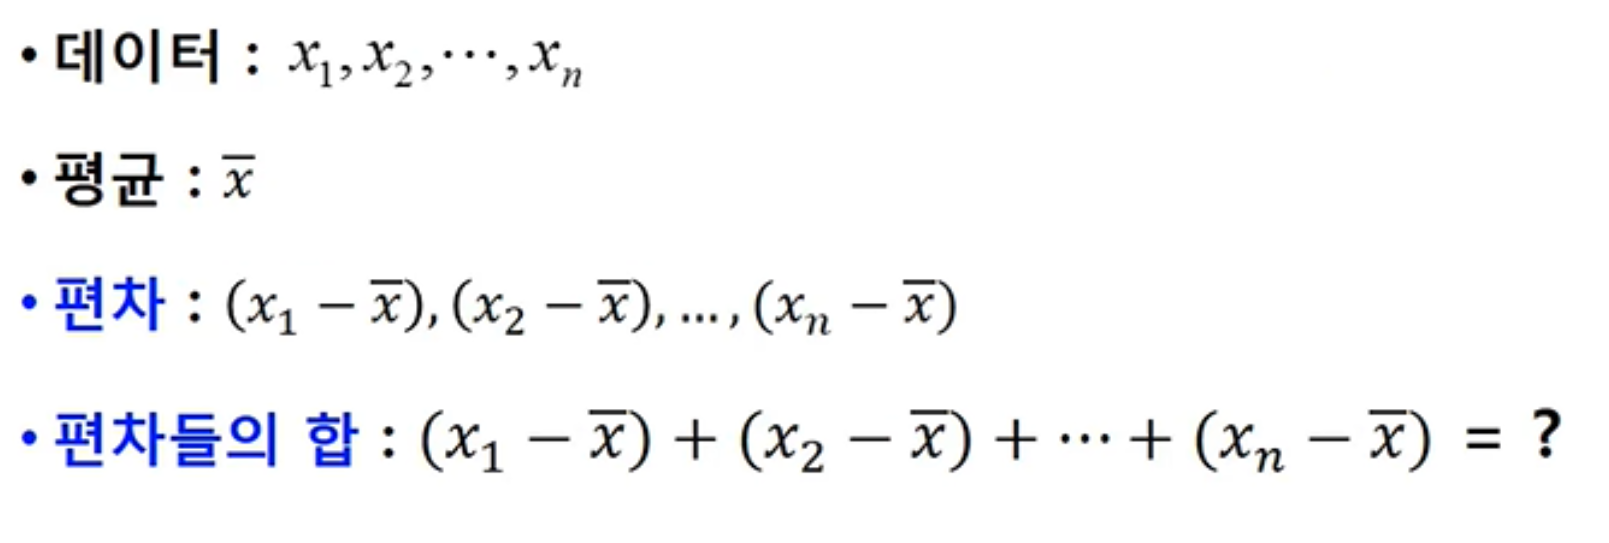
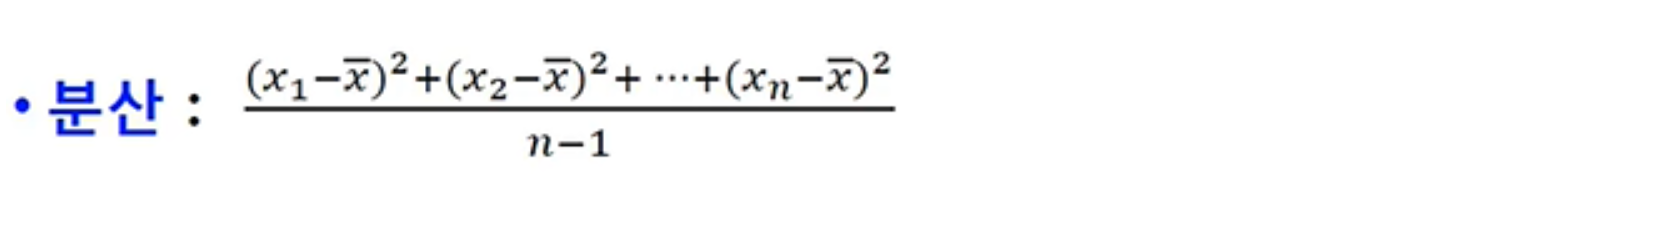
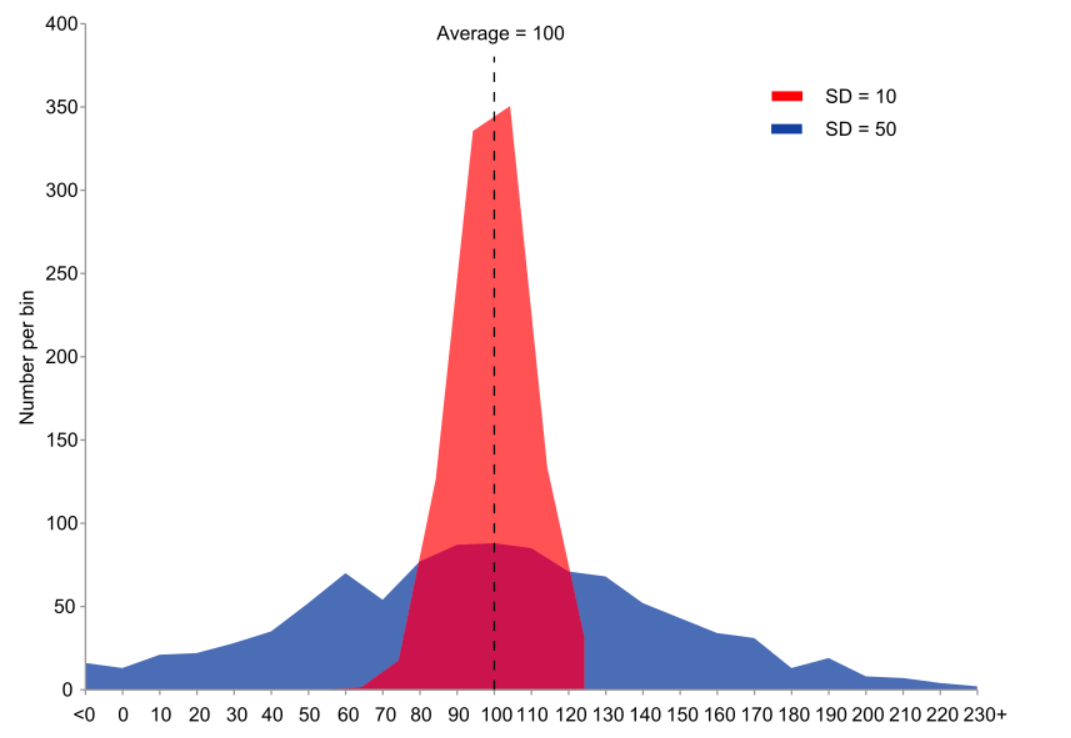

### 공분산
- 하나의 변수가 아닌 여러개의 변수, 즉 두개의 변수로 구한 분산값
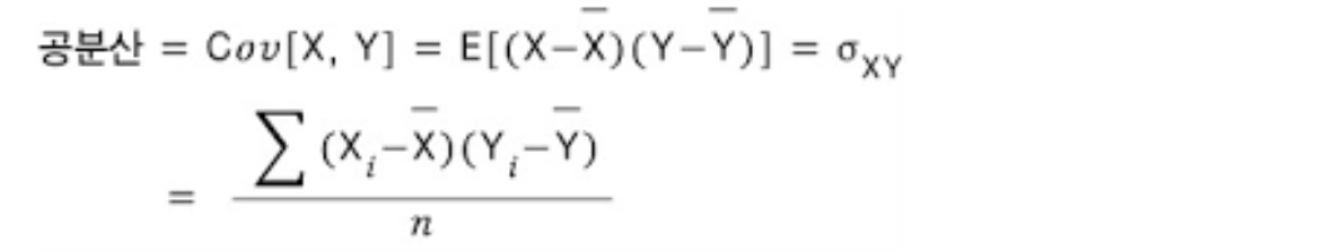
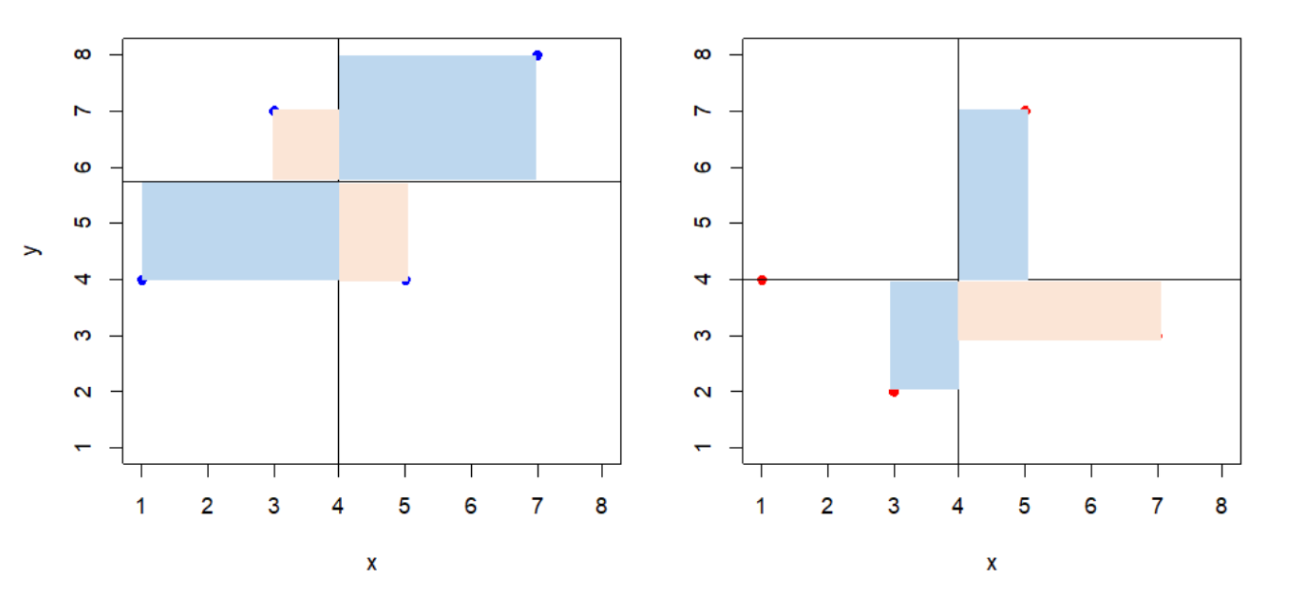
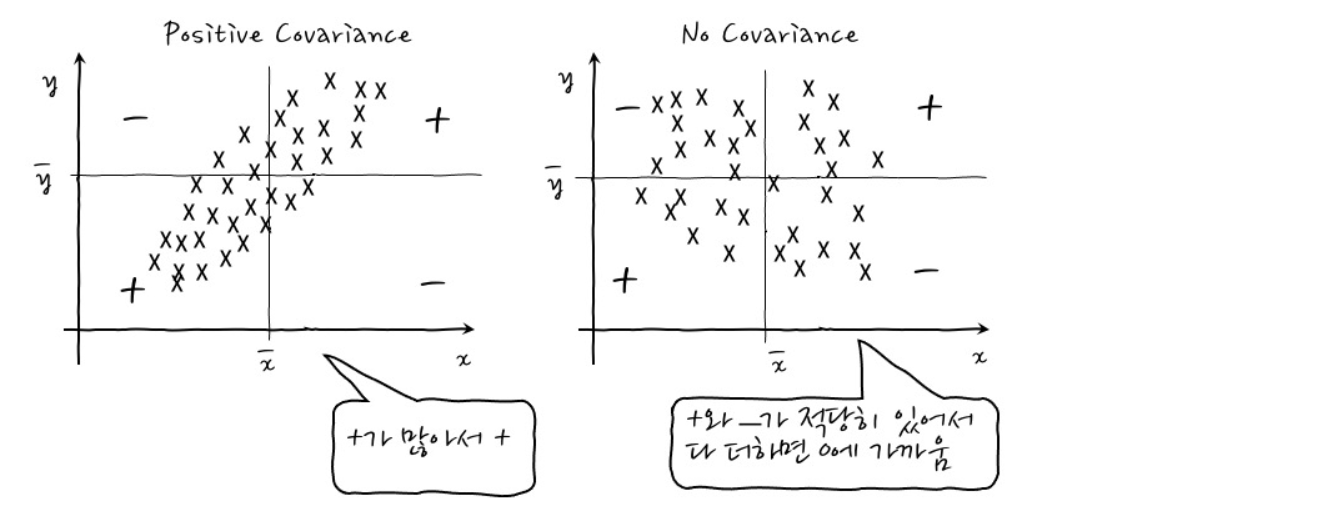
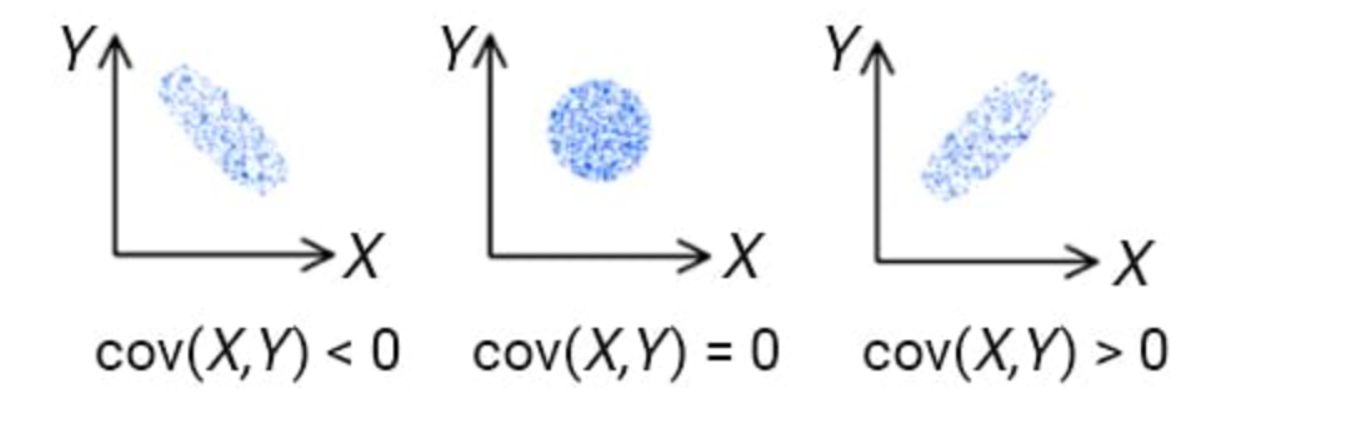

- 공분산 값이 0보다 크다 -> 두 변수가 비례하는 관계
- 공분산 값이 0보다 작다 -> 두 변수가 반비례하는 관계
- 공분산 값이 0에 가깝다 -> 두 변수는 서로 영향을 주지 x

### 상관계수
- 공분산 값을 -1 ~ 1 값으로 정규화 한 값
- 상관계수가 0보다 크면 양의 상관관계(비례)
- 상관계수가 0보다 작으면 음의 상관관계(반비례)
<br><br>
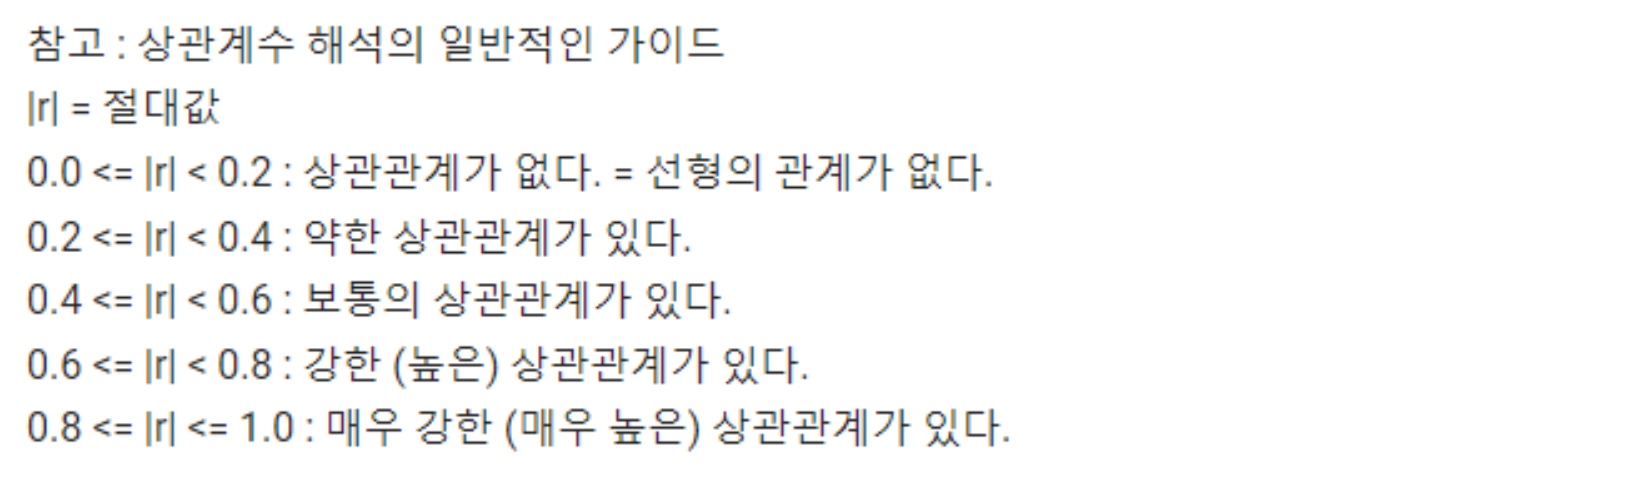

In [34]:
# 성과평가점수과 연봉의 상관계수 확인하기
rs = hr_info[['ORG_CD','PERFORMANCE_SCORE','SALARY']].groupby(by='ORG_CD').mean()
rs.corr()

,PERFORMANCE_SCORE,SALARY
PERFORMANCE_SCORE,1.000000,0.665089
SALARY,0.665089,1.000000


- 어느정도 상관관계가 있다
- 조직의 성과평가점수가 높으면 연봉이 높은 편이라 할 수 있다

In [38]:
hr_info.columns

Index(['EID', 'ENAME', 'GENDER', 'ORG_CD', 'POS_CD', 'AGE', 'SERVICE_YEAR',
       'EDU_LEVEL', 'PERFORMANCE_SCORE', 'SALARY', 'LAST_PROMO_DT',
       'TRAINING_HOURS', 'SKILLS', 'ACTIVE_STATE', 'HIRE_DATE', 'RETIRE_DATE',
       'RETIRE_REASON', 'REHIRE_YN', 'NATION', 'ROUNDING_DEDUCTION'],
      dtype='object')

In [40]:
# 수치 데이터 전체 상관계수 확인
hr_info[['PERFORMANCE_SCORE','SALARY','AGE','SERVICE_YEAR','TRAINING_HOURS']].corr()

,PERFORMANCE_SCORE,SALARY,AGE,SERVICE_YEAR,TRAINING_HOURS
PERFORMANCE_SCORE,1.000000,0.609152,0.582203,0.492801,0.551200
SALARY,0.609152,1.000000,0.961699,0.970875,0.628931
AGE,0.582203,0.961699,1.000000,0.932563,0.575867
SERVICE_YEAR,0.492801,0.970875,0.932563,1.000000,0.559911
TRAINING_HOURS,0.551200,0.628931,0.575867,0.559911,1.000000
